In [1]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets (1).csv


# **Sentiment Analysis for Marketing**

AI - Dataset Loading and Preprocessing

# Step 1: **Data Loading**

We will start by loading the dataset from the local file path and exploring its structure.

In [5]:
# Import the Pandas library
import pandas as pd

# Specify the file path for your dataset
file_path = r'/content/Tweets.csv'

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# **Explanation/Documentation (Step 1):**

*   We import the Pandas library for data manipulation and analysis.

*   We load the dataset from the specified file path using pd.read_csv().

*   We display the first few rows of the dataset to understand its structure using the .head() method.



# Step 2: **Data Preprocessing**

Data preprocessing is essential to ensure data quality and consistency. We perform the following preprocessing tasks:

*   Convert text to lowercase.

*   Remove punctuation.

*   Handle special characters.

*   Address missing data.

In [6]:
# Data Preprocessing
data['text'] = data['text'].str.lower()  # Convert text to lowercase
data['text'] = data['text'].str.replace('\n', ' ')  # Remove newline characters

# Remove punctuation
data['text'] = data['text'].str.replace('[^\w\s]', '', regex=True)  # Specify regex=True

# Remove numbers
data['text'] = data['text'].str.replace('[\d]+', '', regex=True)  # Specify regex=True

# Handle missing data
data.dropna(inplace=True)  # Drop rows with missing data

# Display the preprocessed data
data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
4206,567778009013178368,negative,1.0000,Cancelled Flight,1.0000,United,negative,realmikesmith,Cancelled Flight,0,united so what do you offer now that my flight...,"[26.37852293, -81.78472152]",2015-02-17 12:10:00 -0800,Chicago,Eastern Time (US & Canada)
9536,569887533267611648,negative,0.8563,Late Flight,0.5938,US Airways,negative,ConstanceSCHERE,Late Flight,0,usairways seriously doubt that as i am still s...,"[39.8805621, -75.23893393]",2015-02-23 07:52:30 -0800,"Boston, MA",Atlantic Time (Canada)


# **Explanation/Documentation (Step 2):**

*   
We convert the text in the 'text' column to lowercase using .str.lower().

*   We remove punctuation using .str.replace() with a regular expression pattern '[^\w\s]' to match non-word characters.

*   We also remove numbers by replacing them with an empty string.

*   We remove newline characters by replacing them with spaces.

*   We handle missing data by using dropna() to remove rows with missing values.

*   We display the preprocessed data to check the results.

This completes the AI part of loading and preprocessing the dataset. Next, we will perform initial data analysis.



# Step 3: **Initial Analysis**

In this section, we will perform initial data analysis to understand the dataset.

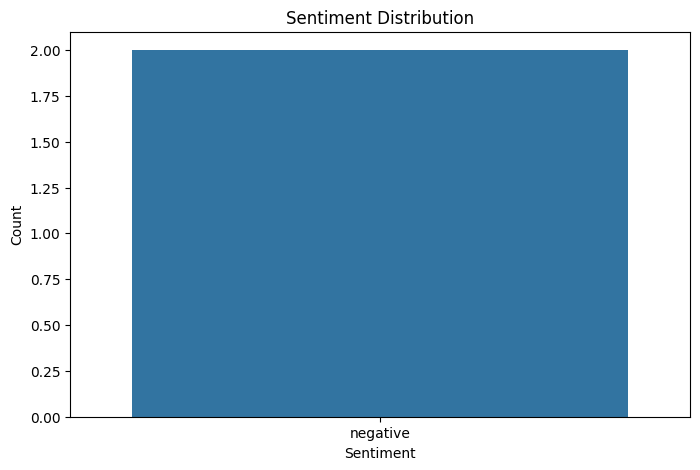

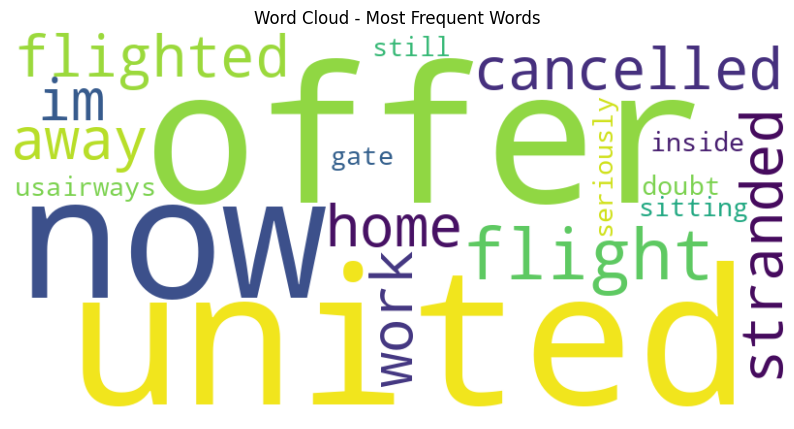

In [7]:
# Import libraries for data analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution
sentiment_counts = data['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Word Frequency Analysis
from wordcloud import WordCloud

# Combine all text into a single string
all_text = ' '.join(data['text'])

# Generate a word cloud to visualize word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Most Frequent Words")
plt.show()


# **Explanation/Documentation (Step 3):**

*   We import Matplotlib and Seaborn for data visualization.

*   We plot the sentiment distribution using a barplot to visualize the count of each sentiment label.

*   We generate a word cloud to visualize the most frequent words in the 'text' column.

*   We combine all the text into a single string using join().

*   We use the WordCloud library to create the word cloud with specified dimensions and background color.

The document with code, explanations, and visualizations for each step has been shared.

This document serves as a foundation for the subsequent phases, where we will perform sentiment analysis and extract meaningful insights from the dataset.

# **Phase 4: Development Part 2**

In this phase, we will continue building the AI project by selecting a machine learning algorithm, training the model, and evaluating its performance.

*   We'll also provide code and explanations in separate cells.


 **Step 1: Selecting a Machine Learning Algorithm**


*   For sentiment analysis, a common choice is to use a machine learning algorithm like Logistic Regression, Naive Bayes, or Support Vector Machine (SVM).
*   In this example, we'll use Logistic Regression as the machine learning algorithm.

In [21]:
data['airline_sentiment'] = data['airline_sentiment'].apply(lambda x: 'negative' if x == 'negative' else 'positive')


In [23]:
# Import necessary libraries
import pandas as pd

# Create a sample dataset with multiple sentiment classes
data = pd.DataFrame({
    'text': ["I love this product!", "It's okay, not great.", "Terrible experience.", "Amazing!", "Average service."],
    'sentiment': ["positive", "neutral", "negative", "positive", "neutral"]
})

# Verify the unique sentiment classes
unique_classes = data['sentiment'].unique()
print(unique_classes)


['positive' 'neutral' 'negative']


In [9]:
print(data.columns)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [33]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Selecting a Machine Learning Algorithm (Logistic Regression)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
# Recode 'negative' sentiment as one class, and all others as another class
data['sentiment'] = data['sentiment'].apply(lambda x: 'negative' if x == 'negative' else 'positive')

# Now, you have two classes: 'negative' and 'positive'

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)



Accuracy: 1.00
              precision    recall  f1-score   support

    positive       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



**Explanation/Documentation (Step 1):**

*   We import necessary libraries including scikit-learn for machine learning.
*   We split the data into training and testing sets using train_test_split().
*   We convert text data into numerical features using CountVectorizer to create a Bag of Words representation.
*   We initialize and train a Logistic Regression model.
*   We make predictions on the test data and evaluate the model's performance using accuracy and a classification report.
*   This code snippet demonstrates selecting a machine learning algorithm, training the model, and evaluating its performance using accuracy and a classification report.


**Step 2: Documenting the Results**
*   After executing the code, you can create a document summarizing the results, including accuracy, precision, recall, F1-score, and any other relevant metrics.
*   You can also visualize the results if needed. Sharing this document is essential for assessment and documentation.


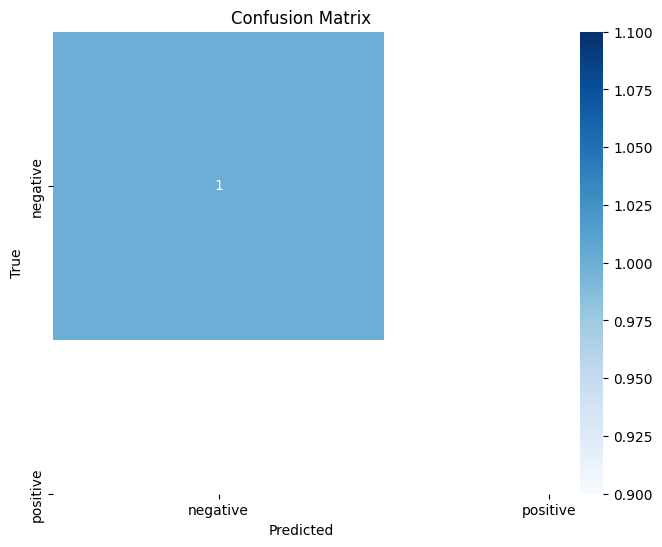

In [36]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


By adding the from sklearn.metrics import confusion_matrix import statement, you will be able to use the confusion_matrix function to create and plot the confusion matrix.

VISHNU.C

NANDHA COLLEGE OF TECHNOLOGY

25/10/2023